**Problema**: Determinar si un cliente es sujeto de credito y/o prestamo bancario a partir de sus caracteristicas socioeconomicas.

**Objetivos:**

1.   Limpieza y manipulacion preliminar de fuente de datos
2.   Identificar relaciones entre variables
3.   Identificar variables que afectan directamente al target o decision final (otorgamiento o no del credito)







**Conformacion Equipo de Trabajo:**
Mery Peña


**Fuente Dataset:**

Kaggle: Loan Application Data



**Criterios para Data Acquisition:**


*   Tamaño del data set < 500 filas
*   Porcentaje de informacion faltante o nula < 8%
*   Dataset no contiene serie temporal
*   Conocimiento del negocio asociado al dataset (Analisis de datos financieros)









**Data Wrangling y EDA**

In [ ]:
#Importando librerias y dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
df=pd.read_csv('Loan.csv')
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [ ]:
# Dimension del dataset y tipos de datos
print(df.shape)
print(df.info())

(500, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB
None


In [ ]:
# Limpiando el dataset:
del df['Loan_ID']
df['Total_Income'] = df['Total_Income'].str.replace('$','') # se elimina el simbolo $ para convertir a variable numerica
df.Total_Income = df.Total_Income.astype(float)
df['Dependents'] = df['Dependents'].str.replace('+','') # se elimina el simbolo + para convertir a variable numerica
df.Dependents = df.Dependents.astype(float)
df.drop('Unnamed: 0', axis=1, inplace=True) #Se elimina la primera columna que no aporta informacion al dataset
df['Loan_Status'] = np.where(df['Loan_Status'] == 'Y', 1, 0) #Asigna valores 0 y 1 para la variable Target
df.Loan_Status = df.Loan_Status.astype(float)
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1.0,5849.0
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0,6091.0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0,3000.0
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0,4941.0
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0,6000.0


In [ ]:
# Verificando % nulos o faltantes
porcentaje_null=(df.isnull().sum()/df.isnull().count())*100
porcentaje_null.sort_values(ascending=False)

Credit_History       8.2
Self_Employed        5.4
LoanAmount           3.6
Loan_Amount_Term     2.8
Dependents           2.4
Gender               1.8
Married              0.6
Total_Income         0.0
Loan_Status          0.0
Property_Area        0.0
CoapplicantIncome    0.0
ApplicantIncome      0.0
Education            0.0
dtype: float64

Debido a que el maximo de nulos es el 8% y no altera el dataset, se completara los datos de las variables numericas sin alterar la distribucion original de los datos, es decir utilizando:

1.   media: para variables que admiten diversos valores
2.   mediana : para variables que solo pueden admitir ciertos valores definidos en el dataentry
3.   cero: para aquellas variables entre cero y 1, o aquellas con mediciones muy bajas

Aquellas filas con nulos en variables categoricas se descartan


In [ ]:
df.Dependents.fillna(df.Dependents.mode()[0],inplace = True)
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace = True )
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median(),inplace = True)
df.Credit_History.fillna(0,inplace = True)
df = df.dropna()
print(df.shape)
print(df.duplicated().sum()) #verificando duplicados

(461, 13)
0


In [ ]:
# Estadisticos Basicos

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dependents,461.0,0.715835,0.999755,0.0,0.0,0.0,1.0,3.0
ApplicantIncome,461.0,5292.219089,5699.620071,150.0,2875.0,3859.0,5746.0,81000.0
CoapplicantIncome,461.0,1525.236269,2185.486187,0.0,0.0,1125.0,2254.0,20000.0
LoanAmount,461.0,141.937813,75.949877,17.0,100.0,128.0,160.0,650.0
Loan_Amount_Term,461.0,343.288503,63.136957,12.0,360.0,360.0,360.0,480.0
Credit_History,461.0,0.774403,0.418429,0.0,1.0,1.0,1.0,1.0
Loan_Status,461.0,0.687636,0.463961,0.0,0.0,1.0,1.0,1.0
Total_Income,461.0,6817.455358,5897.645437,1442.0,4133.0,5332.0,7542.0,81000.0


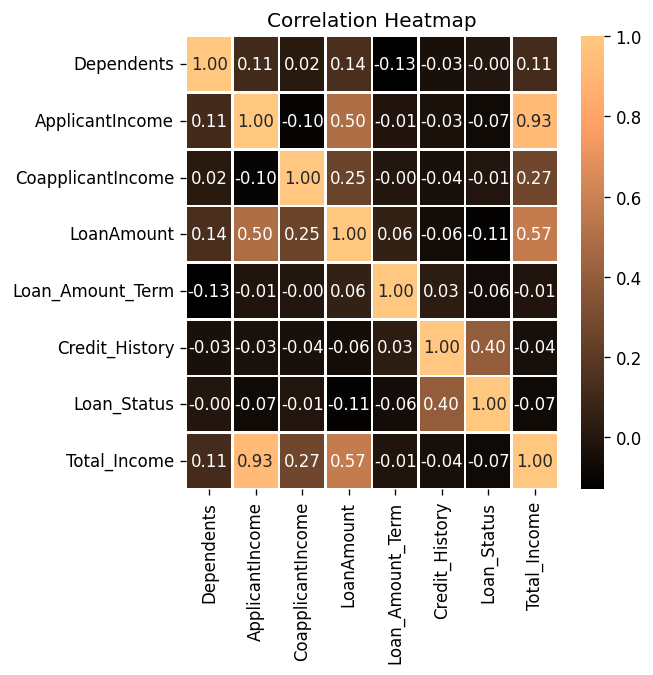

In [ ]:
#Mapa de Correlaciones
plt.figure(dpi = 120,figsize= (5,5))
sns.heatmap(df.corr(), fmt = ".2f",annot=True,lw=1,cmap = 'copper')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Insights: Correlacion moderada y muy alta entre el salario del aplicante al credito y el monto del salario y total del salario del grupo familiar respectivamente.
Correlacion baja entre el salario del coaplicante del credito y el monto del credito.
De lo anterior se entiende que el monto aprobado del credito depende en mayor medida del aplicante.

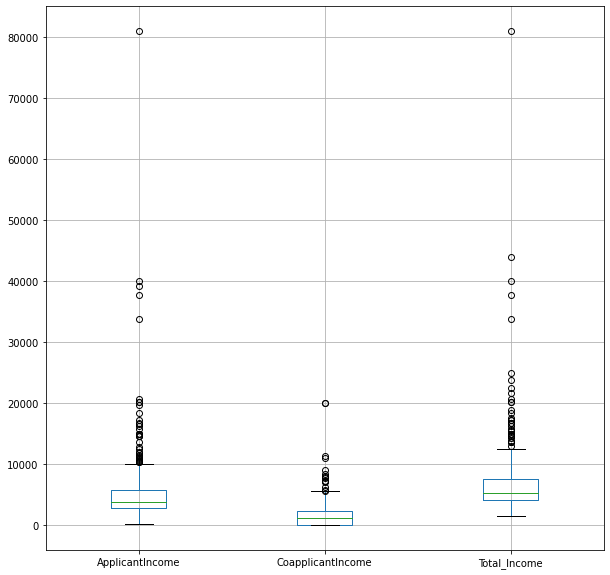

In [ ]:
# Se analizan las tres variables numericas asociadas al salario para determinar los outliers
plt.figure(figsize=(10,10))
boxplot = df.boxplot(column=['ApplicantIncome', 'CoapplicantIncome', 'Total_Income' ])

In [ ]:
#Deteccion de anomalias: se utiliza la informacion entre el tercero y el primer cuartil

# inferior (Q1 − 1.5x (Q3-Q1)) or superior (Q3 + 1.5x Q3-Q1)
# MAXIMO= 7542+ 1.5(7542-4133)= 12655


Filtro aplicado: Se corrigen los outliers de la variable Total_Income, la cual depende del ApplicantIncome.



In [ ]:
df = df.query('Total_Income < 12655')
print(df.shape)

(426, 13)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Coeficiente de Simetria: 0.916238
Curtosis:  0.287471


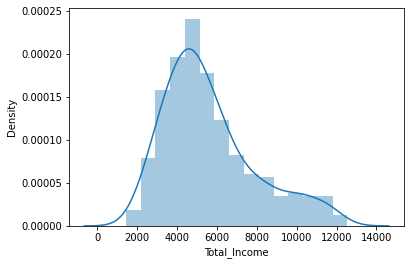

In [ ]:
sns.distplot(df['Total_Income'])
print("Coeficiente de Simetria: %f"%  df['Total_Income'].skew())
print("Curtosis:  %f" %  df['Total_Income'].kurt())

Si el coeficiente de simetria esta entre -0.5 y 0.5 entonces la data es simetrica.

Distribucion mesoocurtica, curtosis cercana a cero.

Se puede utilizar la serie de datos con estas caracteristicas

<Figure size 720x480 with 0 Axes>

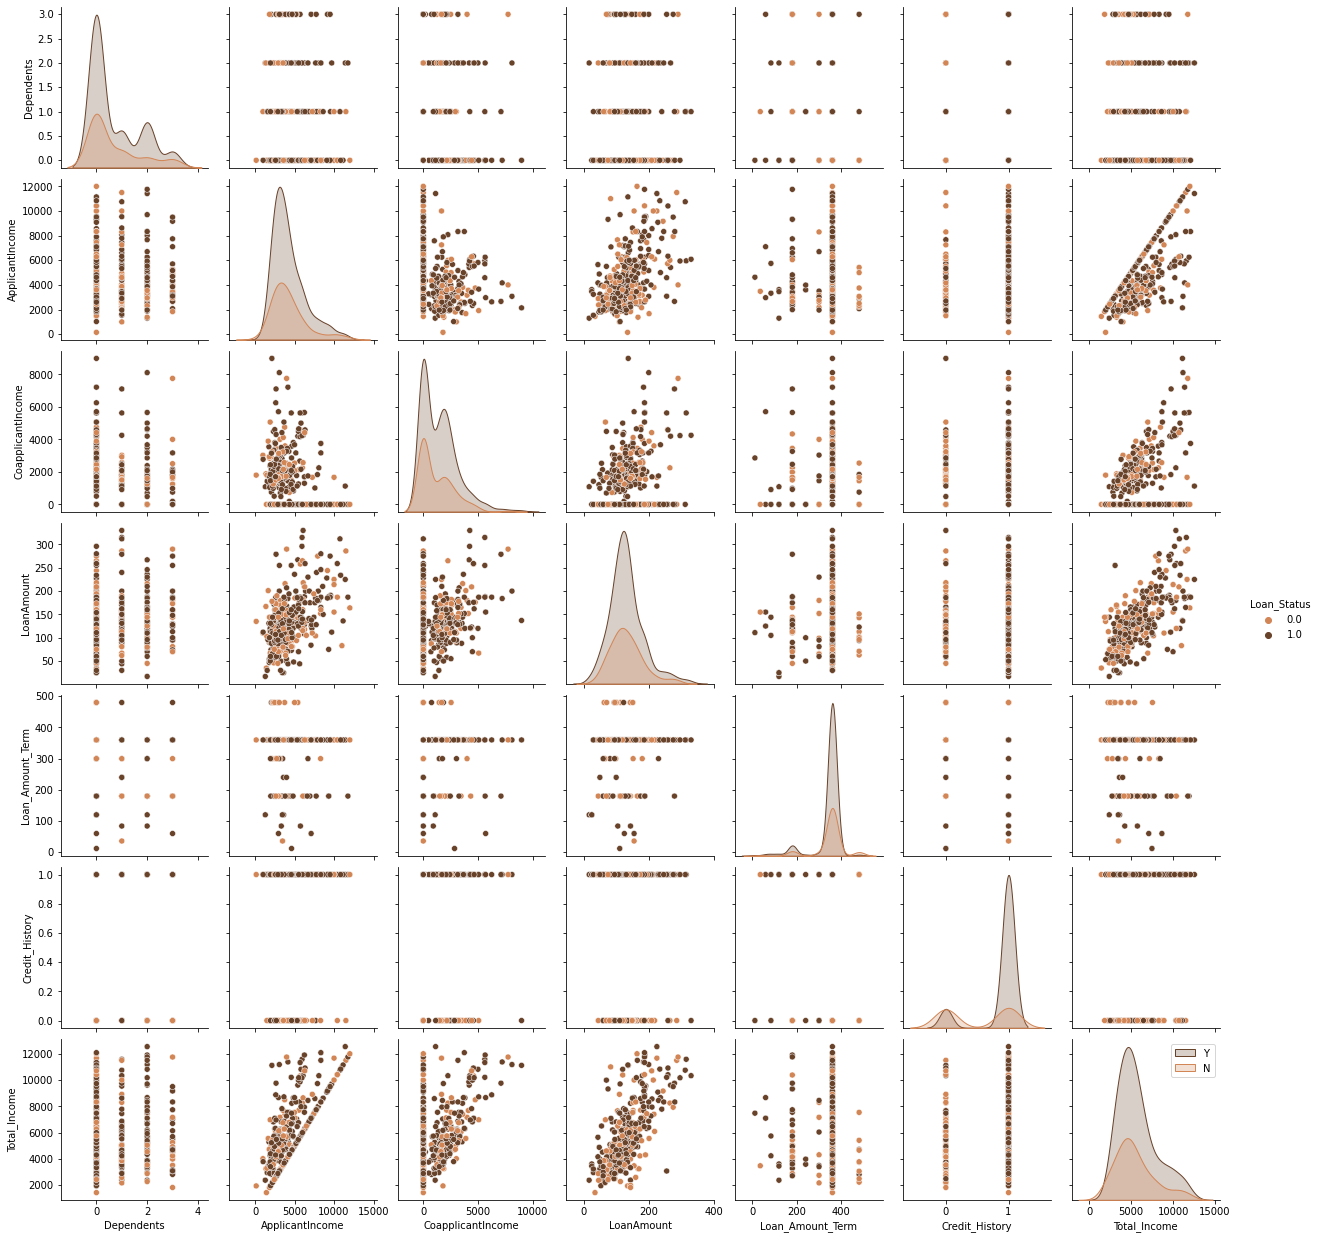

In [ ]:
#Crear el Pairplot para comparar variables numericas
plt.figure(dpi = 120)
sns.pairplot(df,hue = 'Loan_Status',palette = 'copper_r')
plt.legend(['Y','N'])
plt.show()

Insights: No se desprenden mayores relaciones entre las demas variables, se aprecia relacion entre historial crediticio (Credit_History) y la aporbacion del credito (Loan_Status), por lo cual se analizara por separado:


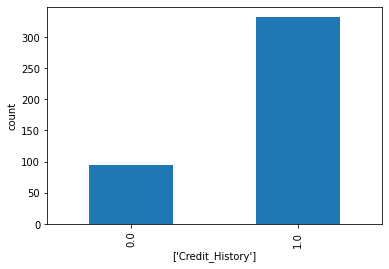

In [ ]:
df.groupby(['Credit_History'])['Loan_Status'].count().plot.bar()

plt.xlabel(['Credit_History'])
plt.ylabel('count')
plt.show()

La aprobacion del credito se ve influenciada por historial crediticio.

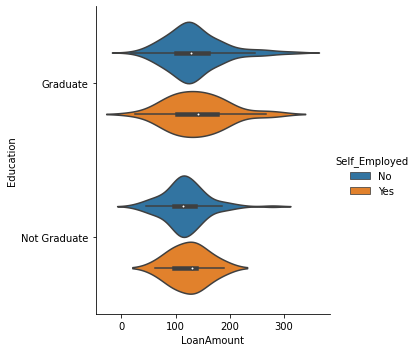

In [ ]:
#Grafico de Violin, densidad para variables categoricas
sns.catplot(x="LoanAmount", y="Education", hue="Self_Employed",
            kind="violin", data=df)



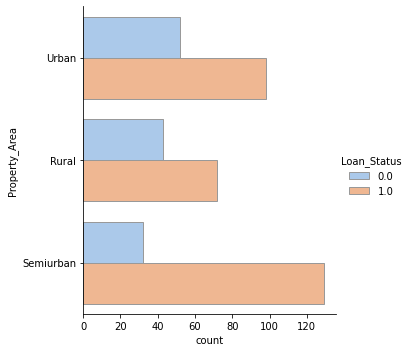

In [ ]:
sns.catplot(y="Property_Area", hue="Loan_Status", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

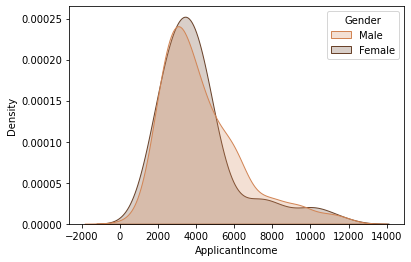

In [ ]:
sns.kdeplot(data=df,x='ApplicantIncome',hue='Gender',fill=True,common_norm=False,palette="copper_r")

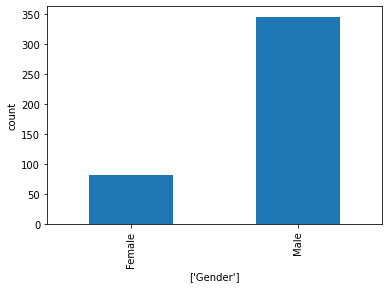

In [ ]:
df.groupby(['Gender'])['Loan_Status'].count().plot.bar()

plt.xlabel(['Gender'])
plt.ylabel('count')
plt.show()

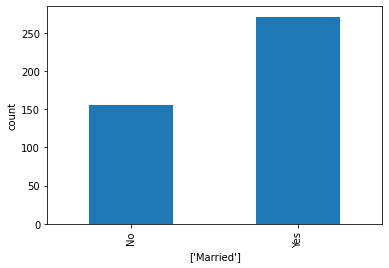

In [ ]:
df.groupby(['Married'])['Loan_Status'].count().plot.bar()

plt.xlabel(['Married'])
plt.ylabel('count')
plt.show()

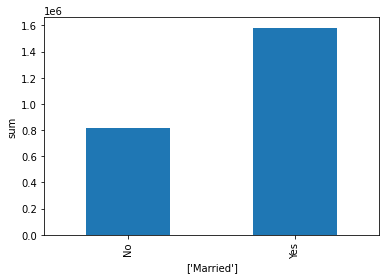

In [ ]:
df.groupby(['Married'])['Total_Income'].sum().plot.bar()

plt.xlabel(['Married'])
plt.ylabel('sum')
plt.show()

Insights:
Hay relacion entre trabajores independientes graduados con mayor asignacion
de monto del credito.

La solicitud de credito son mas propensas de tener exito para propiedades semiurbanas

El genero no determina el salario del aplicante, pero la mayoria de los creditos aprobados corresponden a los solicitantes hombres.

Solicitantes casados con mayor cantidad de solicitud aprobadas y con el mayor rango salarial.


**Seleccion de Modelos**


In [ ]:
#importando librerias


from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
df.rename(columns = {'Loan_Status' : 'label'}, inplace = True)#Columna Target
columnas=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Total_Income']
x = df[columnas] # Features
y = df.label
x.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,No,0.0,Graduate,No,5849,0.0,144.020747,360.0,1.0,Urban,5849.0
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,6091.0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,3000.0
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4941.0
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,6000.0


In [ ]:
X=pd.get_dummies(x)
X.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Total_Income', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [ ]:
#diviendo el data set para entrenamiento
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=10)

**Comparamos diferentes algoritmos:**

In [ ]:
dtf = DecisionTreeClassifier(criterion="entropy", max_depth=3,random_state=10)    # 1) arbol clasificacion
dtf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

In [ ]:
knn = KNeighborsClassifier()  #2) KNN
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
rfc=RandomForestClassifier(n_estimators=1000)   # 3) Random Forest
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
n_b = GaussianNB()          #4) Gaussian Bayes
n_b.fit(X_train, y_train)

GaussianNB()

In [ ]:
svc = SVC()                  #5) SVC
svc.fit(X_train, y_train)

SVC()

In [ ]:
lr = LogisticRegression(solver='lbfgs', max_iter=500) # 6) Regresion Logistica , maxima iteracion limitada para evitar error de convergencia
lr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

**Comparando accuracy**

In [ ]:

#1)
print(dtf.score(X_test, y_test))
#2)
print(knn.score(X_test, y_test))
#3
print(rfc.score(X_test, y_test))
#4)
print(n_b.score(X_test, y_test))
#5)
print(svc.score(X_test, y_test))
#6)
print(lr.score(X_test, y_test))

0.75
0.59375
0.71875
0.65625
0.7421875
0.703125


El arbol de decision tiene el mejor accuracy

In [ ]:
#Prediccion
y_test_pred = dtf.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.762589928057554


**Matriz de Confusion**



[[16 17]
 [15 80]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


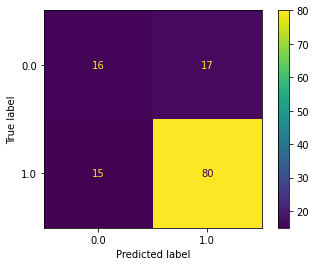

In [ ]:
#Matriz de Confusión
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(dtf, X_test, y_test)
plt.show()

**Metricas Precision, Recall, F1**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

Precision Score of the classifier is: 0.8247422680412371
Recall Score of the classifier is: 0.8421052631578947
F1 Score of the classifier is: 0.8333333333333333


**Curva ROC**

AUC for our classifier is: 0.7103668261562999


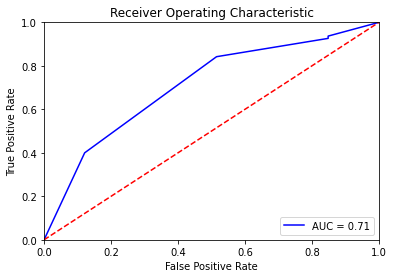

In [ ]:
#Curva ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = dtf.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Evaluacion de modelos con metricas adicionales:**

In [ ]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 0.25
Mean Squared Error: 0.25
Root Mean Squared Error: 0.5


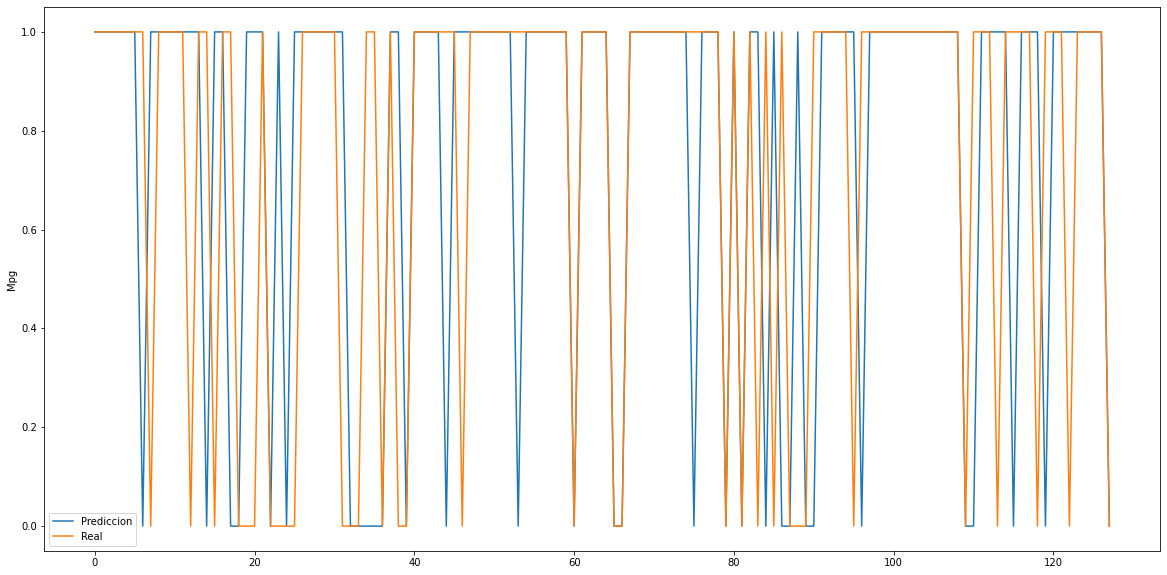

In [ ]:
plt.figure(figsize = (20,10))

plt.plot(y_test_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Mpg')

plt.legend()
plt.show()

**Seleccion de Hyperparametros para decision tree**



In [ ]:
dtf = DecisionTreeClassifier(criterion="entropy", max_depth=3,random_state=10)    # 1) arbol clasificacion original
dtf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

In [ ]:
# parametro (min_impurity_decrease) en vez de max_depth = mismo resultado
dtf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.1,random_state=10)
dtf.fit(X_train, y_train)
print(dtf.score(X_test, y_test))


0.75


In [ ]:
# parametro (max_leaf_nodes)= ligera mejora del resultado, solo para un valor igual a 5
dtf = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5,max_depth=3,random_state=10)
dtf.fit(X_train, y_train)
print(dtf.score(X_test, y_test))

0.7578125


In [ ]:
#Comparando el resultado anterior con un modelo boosting
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.7421875